In [48]:
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns

In [ ]:
# parameters
SEX_SCHEMA_THRESHOLD = 1
HOMOSEXUALITY_THRESHOLD = 1.25

In [272]:
mascfem_loadings = [0.6, 0.9, 0.75, 0.65, 0.3, 0.2, 0.1, 0.3, 0.1, 0.4]

class Subject():
    def __init__(self):
        self.mascfem = 0
        self.features = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        self.autogynephilia = 0
        self.autoandrophilia = 0
        self.etii_etiologic = False
        self.cross_schematic = False
        self.transsexual = False
        return

    def generate_feature(self, index, feature_loading):
        term_1 = feature_loading * self.mascfem
        error = np.random.randn()
        feature = term_1 + error
        self.features[index] = feature
        return
    
    def determine_agp(self):
        if self.features[0] < -1.25:
            self.autogynephilia = 0
            return
        self.autogynephilia = np.random.standard_exponential()
        return
        
    def determine_aap(self):
        if self.features[0] > 1.25:
            self.autoandrophilia = 0
            return
        self.autoandrophilia = np.random.standard_exponential()
        return
    
    def to_dict(self):
        return {
            'trans': self.transsexual,
            'orientation': self.features[0],
            'agp': self.autogynephilia,
            'aap': self.autoandrophilia,
            'cross-schematic': self.cross_schematic,
            'etii': self.etii_etiologic,
            'overall masc-fem': self.mascfem
        }



class Masc(Subject):
    def __init__(self):
        super().__init__()
        self.mascfem = np.random.normal(4, 1.75)
        for index, loading in enumerate(mascfem_loadings):
            self.generate_feature(index, loading)
        return
    
    def determine_etii(self):
        multiplier = 1 + (self.autogynephilia ** self.autogynephilia)
        if np.random.binomial(1, (0.0001 * multiplier)):
            self.etii_etiologic = True
            self.transsexual = True
        return
    
    def determine_cross_schema(self):
        if self.features[1] > -SEX_SCHEMA_THRESHOLD:
            self.cross_schematic = True
            self.transsexual = True

        
    
class Fem(Subject):
    def __init__(self):
        super().__init__()
        self.mascfem = np.random.normal(-4, 1.75)
        for index, loading in enumerate(mascfem_loadings):
            self.generate_feature(index, loading)
        return
    
    def determine_etii(self):
        multiplier = 1 + (self.autoandrophilia ** self.autoandrophilia)
        if np.random.binomial(1, (0.0001 * multiplier)):
            self.etii_etiologic = True
            self.transsexual = True
        return
    
    def determine_cross_schema(self):
        if self.features[1] > SEX_SCHEMA_THRESHOLD:
            self.cross_schematic = True
            self.transsexual = True

In [242]:
male_sample: list[Subject] = []
female_sample: list[Subject] = []

for i in range(500000):
    male_sample.append(Masc())
    female_sample.append(Fem())

sample = male_sample + female_sample

<Axes: ylabel='Count'>

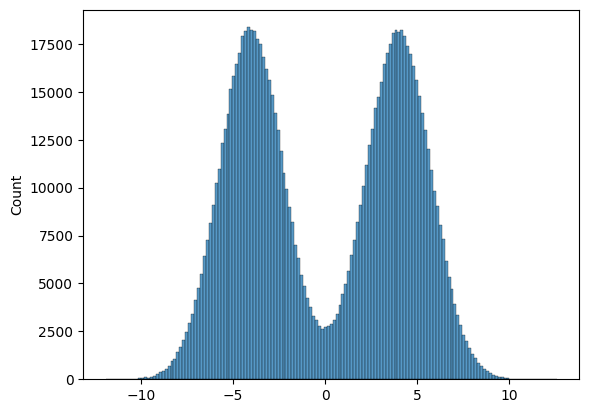

In [243]:
mascfem_dist = []

for subject in sample:
    mascfem_dist.append(subject.mascfem)

mascfem_dist = np.array(mascfem_dist)

sns.histplot(mascfem_dist)

<Axes: ylabel='Count'>

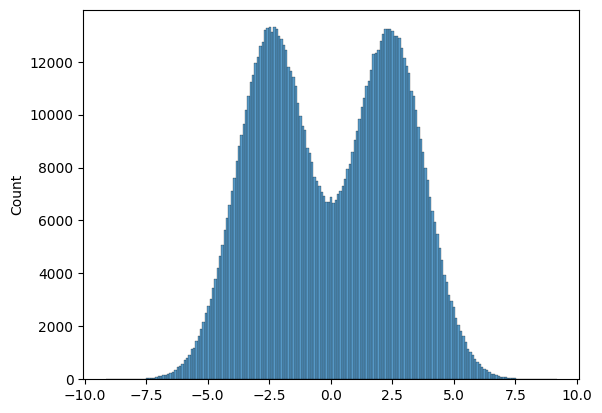

In [244]:
trait_1_dist = []

for subject in sample:
    trait_1_dist.append(subject.features[0])

trait_1_dist = np.array(trait_1_dist)
sns.histplot(trait_1_dist)

<Axes: ylabel='Count'>

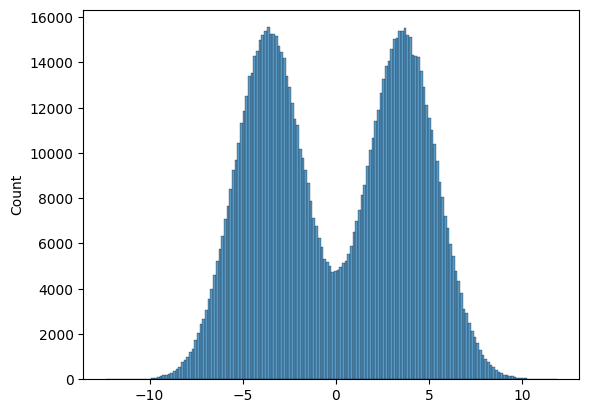

In [245]:
trait_2_dist = []

for subject in sample:
    trait_2_dist.append(subject.features[1])

trait_2_dist = np.array(trait_2_dist)
sns.histplot(trait_2_dist)

In [246]:
corr1 = stats.pearsonr(mascfem_dist, trait_1_dist)
corr2 = stats.pearsonr(mascfem_dist, trait_2_dist)
corr1, corr2

(PearsonRResult(statistic=np.float64(0.934536064556257), pvalue=np.float64(0.0)),
 PearsonRResult(statistic=np.float64(0.9691753887796066), pvalue=np.float64(0.0)))

ok, let's suppose feature 1 corresponds to something that encodes sexual orientation and feature 2 corresponds to something that encodes some kind of thing that leads to gender dysphoria/incongruence. let's say -1.25 to 1.25 is bisexuality. 1.25+ is gynesexuality, >-1.25 is androsexuality.

let's say that for males, -1 or less corresponds to sufficient gender dysphoria for clinical presentation.
for females, it's 1+

In [247]:
male_sexuality_dist = []
female_sexuality_dist = []

for subject in male_sample:
    male_sexuality_dist.append(subject.features[0])

male_sexuality_dist = np.array(male_sexuality_dist)

for subject in female_sample:
    female_sexuality_dist.append(subject.features[0])

female_sexuality_dist = np.array(female_sexuality_dist)


male_GI_dist = []
female_GI_dist = []

for subject in male_sample:
    male_GI_dist.append(subject.features[1])

male_GI_dist = np.array(male_GI_dist)

for subject in female_sample:
    female_GI_dist.append(subject.features[1])

female_GI_dist = np.array(female_GI_dist)

In [248]:
gays = male_sexuality_dist[(male_sexuality_dist < -1.25)]
lesbians = female_sexuality_dist[(female_sexuality_dist > 1.25)]

bi_males = male_sexuality_dist[(male_sexuality_dist <= 1.25) & (male_sexuality_dist >= -1.25)]

bi_females = female_sexuality_dist[(female_sexuality_dist <= 1.25) & (female_sexuality_dist >= -1.25)]

transfems = male_GI_dist[(male_GI_dist < -1)]
transmascs = female_GI_dist[(female_GI_dist > 1)]

print(f'Androsexual Natal Males: {(len(gays) / len(sample)) * 100}%')
print(f'gynesexual Natal Females: {(len(lesbians)  / len(sample)) * 100}%')
print(f'bisexual Natal Males: {(len(bi_males)  / len(sample)) * 100}%')
print(f'bisexual Natal Females: {(len(bi_females)  / len(sample)) * 100}%')
print(f'Dysphoric Natal Males: {(len(transfems)  / len(sample)) * 100}%')
print(f'Dysphoric Natal Females: {(len(transmascs)  / len(sample)) * 100}%')

Androsexual Natal Males: 0.2885%
gynesexual Natal Females: 0.2899%
bisexual Natal Males: 10.3968%
bisexual Natal Females: 10.3131%
Dysphoric Natal Males: 0.3402%
Dysphoric Natal Females: 0.3431%


In [249]:
male_sexuality_dist[0] < 10
transfem_indecies = np.where(male_GI_dist < -1)
transfem_indecies[0]

array([   354,    409,    490, ..., 499480, 499665, 499843])

In [269]:
transfem_indecies = np.where(male_GI_dist < -1)[0]
transfem_sexualities = []

for i in transfem_indecies:
    if male_sexuality_dist[i] < -1.25:
        transfem_sexualities.append(0)
    if male_sexuality_dist[i] > 1.25:
        transfem_sexualities.append(1)
    else:
        transfem_sexualities.append(2)

print(f'transbians: {transfem_sexualities.count(1) / len(transfem_sexualities) * 100}')
print(f'transbis: {transfem_sexualities.count(2) / len(transfem_sexualities) * 100}')
print(f'transhets: {transfem_sexualities.count(0) / len(transfem_sexualities) * 100}')



transbians: 11.805201427842938
transbis: 74.93625701172871
transhets: 13.258541560428352


In [256]:
transfem_pop = []

for i in transfem_indecies:
    transfem_pop.append(male_sample[i])

transfem_mascfem = []

for transfem in transfem_pop:
    transfem_mascfem.append(transfem.mascfem)

transfem_mascfem = np.array(transfem_mascfem)

male_mascfem = []

for male in male_sample:
    male_mascfem.append(male.mascfem)

male_mascfem = np.array(male_mascfem)

print('(negative is feminine, positive is masculine)')
print(f'mean transfem cerebral differantiation: {transfem_mascfem.mean()}')
print(f'mean male (all sexuality & gender) cerebral differentiation: {male_mascfem.mean()}')

(negative is feminine, positive is masculine) n/
mean transfem cerebral differantiation: -0.15839751394294724
mean male (all sexuality & gender) cerebral differentiation: 4.001173331373406


<Axes: ylabel='Count'>

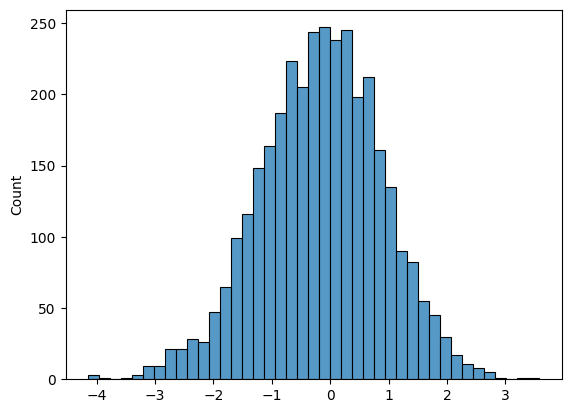

In [264]:
sns.histplot(transfem_mascfem)

In [270]:
transbian_pop = []

for transfem in transfem_pop:
    if transfem.features[0] > 1.25:
        transbian_pop.append(transfem)

transbian_mascfem = []

for transbian in transbian_pop:
    transbian_mascfem.append(transbian.mascfem)

transbian_mascfem = np.array(transbian_mascfem)

transbian_mascfem.mean()

np.float64(0.7582280142195563)

<Axes: ylabel='Count'>

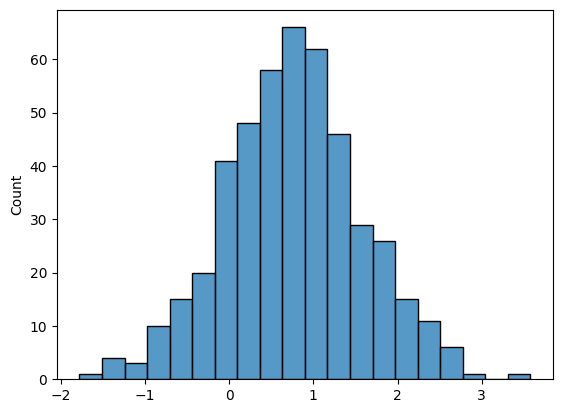

In [271]:
sns.histplot(transbian_mascfem)